# 📊 Analisis Data Penjualan Retail - Segmentasi & Retensi Pelanggan

## 1. Pendahuluan
**Tujuan Proyek**:
- Membersihkan dan menganalisis data transaksi penjualan tahun 2019.
- Melakukan segmentasi produk berdasarkan volume dan revenue.
- Menganalisis perilaku pelanggan menggunakan cohort analysis.
- Mengidentifikasi sensitivitas harga produk.
- Mengetahui tren penjualan dan basket size.

**Dataset**: `Sales_Transaction_Intermediate_Original.csv`


## 2. Data Preparation & Cleaning 

### 2.1 Import Library
Library utama yang digunakan untuk analisis data, visualisasi, dan pemrosesan.

### 2.2 Load & Cek Struktur Data
- Membaca file CSV asli.
- Mengecek struktur kolom, tipe data, dan jumlah data.

### 2.3 Cleaning Data
Langkah-langkah pembersihan data:
- Menghapus duplikat
- ...


In [5]:
# 1.1 Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd

# Load file CSV baru
df = pd.read_csv("Sales_Transaction_Intermediate_Original.csv")

# Konversi kolom tanggal
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Tambahkan kolom bulan
df['Month'] = df['Date'].dt.month

# Cek distribusi bulan
print(df['Month'].value_counts().sort_index())

Month
1     34808
2     27409
3     36259
4     29466
5     36578
6     36440
7     39041
8     34935
9     49767
10    60145
11    84047
12    67455
Name: count, dtype: int64


In [15]:
# 1.2 Load Data
df = pd.read_csv('Sales_Transaction_Intermediate_Original.csv')
df.shape

(536350, 8)

In [16]:
# 1.3 Salin data ke df_cleaned untuk proses cleaning
df_cleaned = df.copy()

In [17]:
# 1.4 Cek Struktur Awal
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [13]:
df.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country', 'Month'],
      dtype='object')

In [18]:
# Hapus duplikat
df_cleaned.drop_duplicates(inplace=True)

# Hapus nilai kosong pada kolom penting (dengan nama baru)
df_cleaned.dropna(subset=['TransactionNo', 'ProductNo', 'ProductName', 'Quantity', 'Date', 'Price', 'CustomerNo', 'Country'], inplace=True)

# Hapus transaksi batal (yang diawali huruf "C")
df_cleaned = df_cleaned[~df_cleaned['TransactionNo'].astype(str).str.startswith('C')]

# Hapus nilai Quantity dan Price yang tidak valid
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['Price'] > 0)]

# Ubah kolom tanggal
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Tambahkan kolom Revenue
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['Price']

# Filter hanya tahun 2019
df_cleaned = df_cleaned[df_cleaned['Date'].dt.year == 2019]
df_cleaned.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Revenue
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64


In [19]:
# Hapus duplikat
df_cleaned.drop_duplicates(inplace=True)

# Hapus nilai kosong pada kolom penting
df_cleaned.dropna(subset=['TransactionNo', 'ProductNo', 'ProductName', 'Quantity', 'Date', 'Price', 'CustomerNo', 'Country'], inplace=True)

# Hapus transaksi batal (yang diawali huruf "C")
df_cleaned = df_cleaned[~df_cleaned['TransactionNo'].astype(str).str.startswith('C')]

# Hapus nilai Quantity dan Price yang tidak valid
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['Price'] > 0)]

# ✅ Ubah kolom tanggal dengan aman
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], dayfirst=True, errors='coerce')

# ✅ Hapus baris yang gagal diubah jadi datetime (NaT)
df_cleaned = df_cleaned.dropna(subset=['Date'])

# ✅ Filter hanya tahun 2019
df_cleaned = df_cleaned[df_cleaned['Date'].dt.year == 2019]

# Tambahkan kolom Revenue
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['Price']

df_cleaned.head()


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Revenue
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64


In [9]:
# 1.5 Tambahkan kolom bulan
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# Cek bulan yang tersedia
df_cleaned['Month'].value_counts().sort_index()
df_cleaned.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Revenue,Month
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,12


## 3. Segmentasi Produk Berdasarkan Volume & Revenue

### 3.1 Tujuan
Mengelompokkan produk berdasarkan performa penjualannya menggunakan dua indikator utama:
- **Transaction Volume** (total `Quantity`)
- **Revenue Total** (total `Revenue`)

Produk kemudian dikategorikan menjadi:
- `Super Popular`: Volume dan Revenue tinggi
- `Popular`: Salah satu tinggi dan tidak ada yang rendah
- `Normal`: Kombinasi sedang
- `Low`: Volume dan Revenue rendah

### 3.2 Metodologi Segmentasi
- Gunakan distribusi kuartil atau metode 20-60-20 untuk membagi produk.
- Hitung `TransactionVolume` dan `RevenueTotal` per produk.
- Buat 3 level: High / Medium / Low → lalu gabungkan jadi segmen final.

### 3.3 Visualisasi
- Gunakan bar chart untuk menunjukkan jumlah produk di tiap segmen.

### 3.4 Insight Awal
- Sebagian besar produk masuk ke segmen `Normal`.
- Produk `Super Popular` jumlahnya lebih sedikit, namun berpotensi besar untuk strategi bisnis.


In [10]:
# 2. Segmentasi Produk Berdasarkan Volume dan Revenue

#Kita akan mengelompokkan produk berdasarkan performa penjualan: total quantity (volume transaksi) dan revenue.
#Hasil akhirnya adalah kategori produk: Super Popular, Popular, Normal, dan Low.
#Hitung total volume dana revenue per produk 
product_df = df_cleaned.groupby('ProductName').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

product_df.rename(columns={
    'Quantity': 'TransactionVolume',
    'Revenue': 'RevenueTotal'
}, inplace=True)

In [11]:
#Hitung kuartil volume dan revenue
volume_q3 = product_df['TransactionVolume'].quantile(0.75)
volume_q1 = product_df['TransactionVolume'].quantile(0.25)
revenue_q3 = product_df['RevenueTotal'].quantile(0.75)
revenue_q1 = product_df['RevenueTotal'].quantile(0.25)

In [12]:
#buat kolom segmentasi voolume dan revenue 
def volume_segment(volume):
    if volume >= volume_q3:
        return 'High'
    elif volume <= volume_q1:
        return 'Low'
    else:
        return 'Medium'

def revenue_segment(revenue):
    if revenue >= revenue_q3:
        return 'High'
    elif revenue <= revenue_q1:
        return 'Low'
    else:
        return 'Medium'

product_df['VolumeSegment'] = product_df['TransactionVolume'].apply(volume_segment)
product_df['RevenueSegment'] = product_df['RevenueTotal'].apply(revenue_segment)

In [13]:
#Buat kolom segmentasi akhir
def final_segment(row):
    if row['VolumeSegment'] == 'High' and row['RevenueSegment'] == 'High':
        return 'Super Popular'
    elif 'High' in [row['VolumeSegment'], row['RevenueSegment']] and 'Low' not in [row['VolumeSegment'], row['RevenueSegment']]:
        return 'Popular'
    elif row['VolumeSegment'] == 'Low' and row['RevenueSegment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

product_df['FinalSegment'] = product_df.apply(final_segment, axis=1)

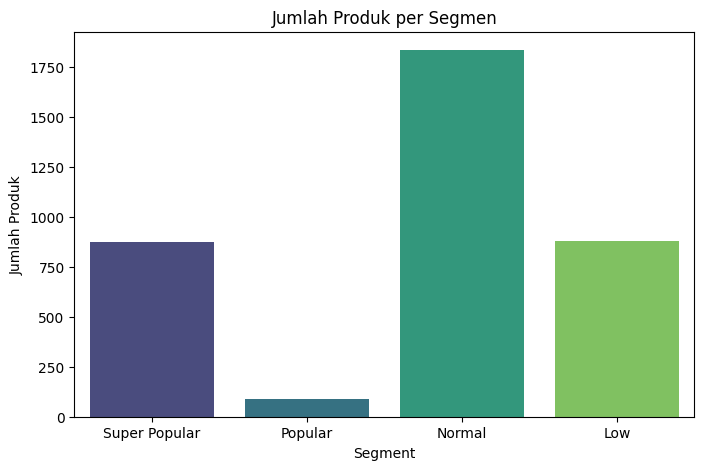

In [14]:
#Visualisasi jumlah produk per segmen
plt.figure(figsize=(8,5))
sns.countplot(data=product_df, x='FinalSegment', order=['Super Popular', 'Popular', 'Normal', 'Low'], palette='viridis')
plt.title('Jumlah Produk per Segmen')
plt.xlabel('Segment')
plt.ylabel('Jumlah Produk')
plt.show()

In [15]:
#Cek hasil
product_df['FinalSegment'].value_counts()

FinalSegment
Normal           1835
Low               877
Super Popular     873
Popular            91
Name: count, dtype: int64

In [15]:
print(product_df.columns)

Index(['ProductName', 'TransactionVolume', 'RevenueTotal', 'VolumeSegment',
       'RevenueSegment', 'FinalSegment'],
      dtype='object')


In [120]:
#Hitung total volume dan revenue per produk  
product_df = df_cleaned.groupby('ProductName').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

product_df.rename(columns={
    'Quantity': 'TransactionVolume',
    'Revenue': 'RevenueTotal'
}, inplace=True)

In [121]:
#Hitng batas atas dan bawah untuk 20%-60%-20%
# Untuk volume transaksi
volume_top20 = product_df['TransactionVolume'].quantile(0.80)
volume_bottom20 = product_df['TransactionVolume'].quantile(0.20)

# Untuk revenue total
revenue_top20 = product_df['RevenueTotal'].quantile(0.80)
revenue_bottom20 = product_df['RevenueTotal'].quantile(0.20)

In [122]:
#Segmentasi volume dan revenue
def volume_segment(volume):
    if volume >= volume_top20:
        return 'Popular'
    elif volume <= volume_bottom20:
        return 'Low'
    else:
        return 'Normal'

def revenue_segment(revenue):
    if revenue >= revenue_top20:
        return 'Popular'
    elif revenue <= revenue_bottom20:
        return 'Low'
    else:
        return 'Normal'

product_df['VolumeSegment'] = product_df['TransactionVolume'].apply(volume_segment)
product_df['RevenueSegment'] = product_df['RevenueTotal'].apply(revenue_segment)

In [123]:
#Buta kolom finealsegment
def final_segment(row):
    if row['VolumeSegment'] == 'Popular' and row['RevenueSegment'] == 'Popular':
        return 'Super Popular'
    elif 'Popular' in [row['VolumeSegment'], row['RevenueSegment']] and 'Low' not in [row['VolumeSegment'], row['RevenueSegment']]:
        return 'Popular'
    elif row['VolumeSegment'] == 'Low' and row['RevenueSegment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

product_df['FinalSegment'] = product_df.apply(final_segment, axis=1)

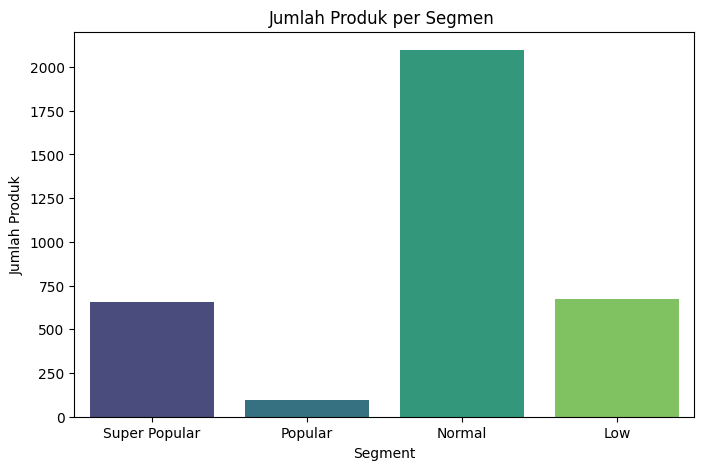

In [124]:
#Visualisasi jumlah produk per segment
plt.figure(figsize=(8,5))
sns.countplot(data=product_df, x='FinalSegment', order=['Super Popular', 'Popular', 'Normal', 'Low'], palette='viridis')
plt.title('Jumlah Produk per Segmen ')
plt.xlabel('Segment')
plt.ylabel('Jumlah Produk')
plt.show()

In [125]:
#Cek hasil
product_df['FinalSegment'].value_counts()

FinalSegment
Normal           2097
Low               672
Super Popular     657
Popular            94
Name: count, dtype: int64

In [76]:
# 2. Segmentasi Produk Berdasarkan Volume dan Revenue (Metode 20-60-20)

Segmentasi dilakukan untuk mengelompokkan produk berdasarkan performa penjualannya.  
Kita melihat dua indikator utama:
- **Volume Transaksi** (`Quantity`)
- **Total Revenue** (`Revenue`)

Produk dikelompokkan ke dalam tiga segmen untuk masing-masing indikator:
- **Top 20%** → `Popular`
- **Middle 60%** → `Normal`
- **Bottom 20%** → `Low`

### 2.1 Hitung Total Volume dan Revenue per Produk
Data dikelompokkan berdasarkan `ProductName`, lalu dihitung total quantity dan revenue untuk masing-masing produk.

### 2.2 Segmentasi Volume dan Revenue (20–60–20 Rule)
Menggunakan metode distribusi persentil:
- Volume ≥ 80% → `Popular`
- Volume ≤ 20% → `Low`
- Sisanya → `Normal`

Begitu juga untuk revenue.

### 2.3 Final Segment: Gabungan Volume dan Revenue
Produk kemudian dikategorikan ke dalam empat segmen:
- `Super Popular`: High di Volume **dan** Revenue
- `Popular`: High di salah satu (volume/revenue), dan tidak Low di satunya
- `Normal`: Kombinasi Medium
- `Low`: Low di kedua metrik

### 2.4 Hasil Segmentasi
Distribusi segmen produk:
- Normal: 1262 produk
- Low: 442 produk
- Super Popular: 415 produk
- Popular: 33 produk

### 2.5 Visualisasi
Grafik batang menunjukkan jumlah produk di tiap segmen.

### Insight:
- Mayoritas produk masuk dalam kategori `Normal`, sesuai ekspektasi 60% distribusi tengah.
- Hanya sebagian kecil produk yang `Super Popular`, yang menjadi fokus perhatian pada analisis selanjutnya.
- Segmentasi ini akan digunakan untuk analisis waktu dan strategi produk lebih lanjut.

SyntaxError: invalid character '→' (U+2192) (3288711091.py, line 9)

In [41]:
#Bandingkan produk super popular bulan juli vs novembar
#Filter data untuk bulan juli dan november
# Tambahkan kolom 'Month' agar lebih mudah filter
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# Filter bulan Juli dan November
july_df = df_cleaned[df_cleaned['Month'] == 7]
november_df = df_cleaned[df_cleaned['Month'] == 11]

In [42]:
#Hitung volume dan revenue per produk masing-masing
# JULI
july_product = july_df.groupby('ProductName').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index().rename(columns={
    'Quantity': 'TransactionVolume',
    'Revenue': 'RevenueTotal'
})

# NOVEMBER
november_product = november_df.groupby('ProductName').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index().rename(columns={
    'Quantity': 'TransactionVolume',
    'Revenue': 'RevenueTotal'
})

In [43]:
#Hitung segmentasi ulang di masing masing bulan 
def segment_products(df):
    v_top = df['TransactionVolume'].quantile(0.80)
    v_bottom = df['TransactionVolume'].quantile(0.20)
    r_top = df['RevenueTotal'].quantile(0.80)
    r_bottom = df['RevenueTotal'].quantile(0.20)
    
    def v_seg(v): return 'Popular' if v >= v_top else 'Low' if v <= v_bottom else 'Normal'
    def r_seg(r): return 'Popular' if r >= r_top else 'Low' if r <= r_bottom else 'Normal'
    
    df['VolumeSegment'] = df['TransactionVolume'].apply(v_seg)
    df['RevenueSegment'] = df['RevenueTotal'].apply(r_seg)
    
    def final_seg(row):
        if row['VolumeSegment'] == 'Popular' and row['RevenueSegment'] == 'Popular':
            return 'Super Popular'
        elif 'Popular' in [row['VolumeSegment'], row['RevenueSegment']] and 'Low' not in [row['VolumeSegment'], row['RevenueSegment']]:
            return 'Popular'
        elif row['VolumeSegment'] == 'Low' and row['RevenueSegment'] == 'Low':
            return 'Low'
        else:
            return 'Normal'
    
    df['FinalSegment'] = df.apply(final_seg, axis=1)
    return df

# Terapkan ke Juli dan November
july_segmented = segment_products(july_product)
nov_segmented = segment_products(november_product)

In [44]:
#bandingkan produk super popular juli vs november
# Ambil hanya produk super popular
july_super = set(july_segmented[july_segmented['FinalSegment'] == 'Super Popular']['ProductName'])
nov_super = set(nov_segmented[nov_segmented['FinalSegment'] == 'Super Popular']['ProductName'])

# Produk yang hanya ada di Juli
only_july = july_super - nov_super
# Produk yang hanya ada di November
only_nov = nov_super - july_super
# Produk yang ada di keduanya
both = july_super & nov_super

print("Jumlah Produk Super Popular Juli:", len(july_super))
print("Jumlah Produk Super Popular November:", len(nov_super))
print("Produk yang sama di kedua bulan:", len(both))

Jumlah Produk Super Popular Juli: 493
Jumlah Produk Super Popular November: 546
Produk yang sama di kedua bulan: 275


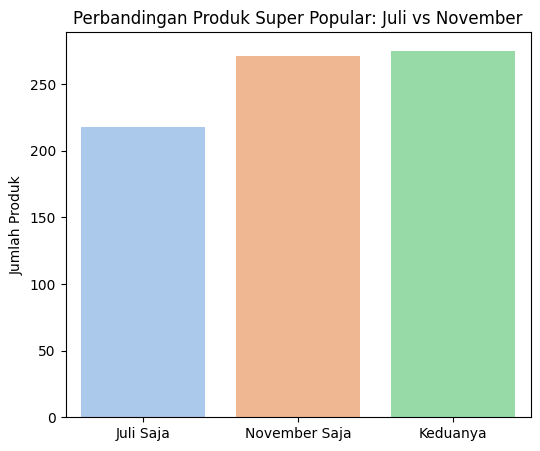

In [20]:
import matplotlib.pyplot as plt

labels = ['Juli Saja', 'November Saja', 'Keduanya']
counts = [len(only_july), len(only_nov), len(both)]

plt.figure(figsize=(6,5))
sns.barplot(x=labels, y=counts, palette='pastel')
plt.title('Perbandingan Produk Super Popular: Juli vs November')
plt.ylabel('Jumlah Produk')
plt.show()

In [40]:
!pip install matplotlib-venn


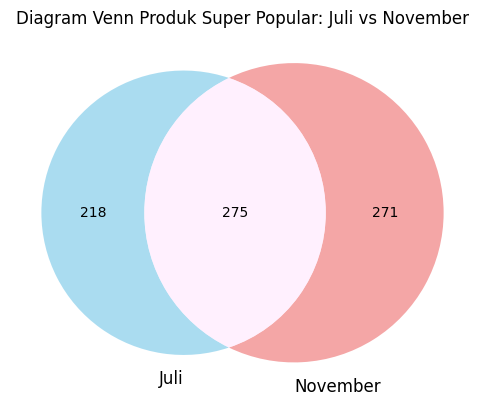

In [45]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Buat diagram venn
plt.figure(figsize=(6,6))
venn2(subsets=(len(only_july), len(only_nov), len(both)),
      set_labels=('Juli', 'November'),
      set_colors=('skyblue', 'lightcoral'),
      alpha=0.7)

plt.title('Diagram Venn Produk Super Popular: Juli vs November')
plt.show()


### 4. Perbandingan Produk Super Popular: Juli vs November

Untuk memahami dinamika produk yang paling digemari pelanggan, dilakukan analisis segmentasi produk **Super Popular** berdasarkan bulan Juli dan November 2019.

📊 Visualisasi berikut menunjukkan hasil perbandingan menggunakan **Diagram Venn**:

- **218 produk** hanya Super Popular di bulan **Juli**
- **271 produk** hanya Super Popular di bulan **November**
- **275 produk** tetap konsisten menjadi Super Popular di **kedua bulan**

🧠 **Insight Bisnis**:
- Banyaknya perbedaan produk populer menunjukkan adanya **perubahan preferensi pelanggan** secara musiman.
- Produk yang tetap populer sepanjang waktu bisa diprioritaskan untuk **strategi pemasaran jangka panjang**.
- Sementara produk yang hanya populer di bulan tertentu bisa dikaitkan dengan **event musiman atau kampanye khusus** (misalnya menjelang libur akhir tahun di November).

🎯 **Rekomendasi**:
- Pertahankan produk yang konsisten populer sebagai andalan bisnis.
- Buat kampanye atau bundling khusus untuk produk musiman menjelang puncak popularitasnya.


In [21]:
july_segmented['FinalSegment'].value_counts()
nov_segmented['FinalSegment'].value_counts()

FinalSegment
Normal           1718
Low               549
Super Popular     546
Popular            56
Name: count, dtype: int64

In [22]:
def segment_products(df):
    # Hitung Q1 dan Q3 untuk Volume & Revenue
    v_q1 = df['TransactionVolume'].quantile(0.25)
    v_q3 = df['TransactionVolume'].quantile(0.75)
    r_q1 = df['RevenueTotal'].quantile(0.25)
    r_q3 = df['RevenueTotal'].quantile(0.75)
    
    # Segmentasi Volume
    def v_seg(v):
        if v >= v_q3:
            return 'High'
        elif v <= v_q1:
            return 'Low'
        else:
            return 'Medium'
    
    # Segmentasi Revenue
    def r_seg(r):
        if r >= r_q3:
            return 'High'
        elif r <= r_q1:
            return 'Low'
        else:
            return 'Medium'
    
    df['VolumeSegment'] = df['TransactionVolume'].apply(v_seg)
    df['RevenueSegment'] = df['RevenueTotal'].apply(r_seg)
    
    # Final Segment
    def final_seg(row):
        if row['VolumeSegment'] == 'High' and row['RevenueSegment'] == 'High':
            return 'Super Popular'
        elif 'High' in [row['VolumeSegment'], row['RevenueSegment']] and 'Low' not in [row['VolumeSegment'], row['RevenueSegment']]:
            return 'Popular'
        elif row['VolumeSegment'] == 'Low' and row['RevenueSegment'] == 'Low':
            return 'Low'
        else:
            return 'Normal'
    
    df['FinalSegment'] = df.apply(final_seg, axis=1)
    return df

In [23]:
july_segmented = segment_products(july_product)
nov_segmented = segment_products(november_product)

In [24]:
july_segmented['FinalSegment'].value_counts()
nov_segmented['FinalSegment'].value_counts()

FinalSegment
Normal           1440
Super Popular     690
Low               683
Popular            56
Name: count, dtype: int64

In [25]:
july_super = set(july_segmented[july_segmented['FinalSegment'] == 'Super Popular']['ProductName'])
nov_super = set(nov_segmented[nov_segmented['FinalSegment'] == 'Super Popular']['ProductName'])

only_july = july_super - nov_super
only_nov = nov_super - july_super
both = july_super & nov_super

print("Jumlah Produk Super Popular Juli:", len(july_super))
print("Jumlah Produk Super Popular November:", len(nov_super))
print("Produk yang sama di kedua bulan:", len(both))

Jumlah Produk Super Popular Juli: 621
Jumlah Produk Super Popular November: 690
Produk yang sama di kedua bulan: 373


In [26]:
print("Juli:", july_product.shape[0])
print("November:", november_product.shape[0])

Juli: 2613
November: 2869


In [27]:
super_popular_products = set(product_df[product_df['FinalSegment'] == 'Super Popular']['ProductName'])

In [28]:
df_cleaned['Month'] = df_cleaned['Date'].dt.month

In [29]:
monthly_super_counts = []

for month in range(1, 13):
    df_month = df_cleaned[df_cleaned['Month'] == month]
    products_in_month = set(df_month['ProductName'].unique())
    super_in_month = super_popular_products & products_in_month
    monthly_super_counts.append(len(super_in_month))

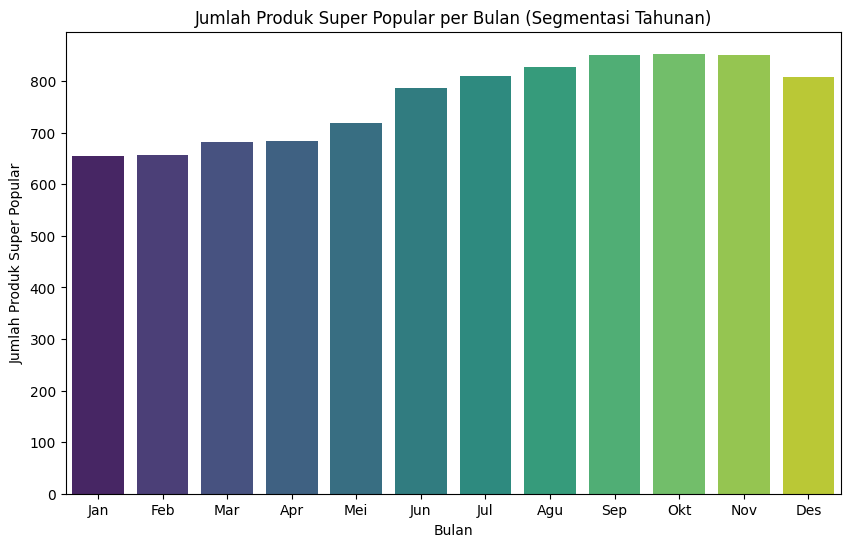

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(range(1, 13)), y=monthly_super_counts, palette='viridis')
plt.title('Jumlah Produk Super Popular per Bulan (Segmentasi Tahunan)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Produk Super Popular')
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'])
plt.show()

##  Segmentasi Pelanggan Berdasarkan Aktivitas & Pembelian

### Tujuan
Mengelompokkan pelanggan berdasarkan **frekuensi transaksi** dan **total revenue** untuk mengetahui:
- Siapa pelanggan paling loyal?
- Siapa pelanggan yang paling bernilai secara bisnis?

### Langkah-langkah:
1. Hitung jumlah transaksi unik per pelanggan
2. Hitung total revenue per pelanggan
3. Gabungkan dan visualisasikan dalam scatter plot

### Insight:
- Pelanggan dengan frekuensi tinggi & revenue besar = target **program loyalitas**
- Pelanggan dengan revenue besar tapi frekuensi rendah = cocok untuk **up-sell**
- Mayoritas pelanggan hanya beli 1–2x dan revenue rendah → perlu strategi reaktivasi

### Rekomendasi:
- Fokus retensi untuk top 10% pelanggan
- Beri promo khusus untuk segmen “potensial tapi belum loyal”


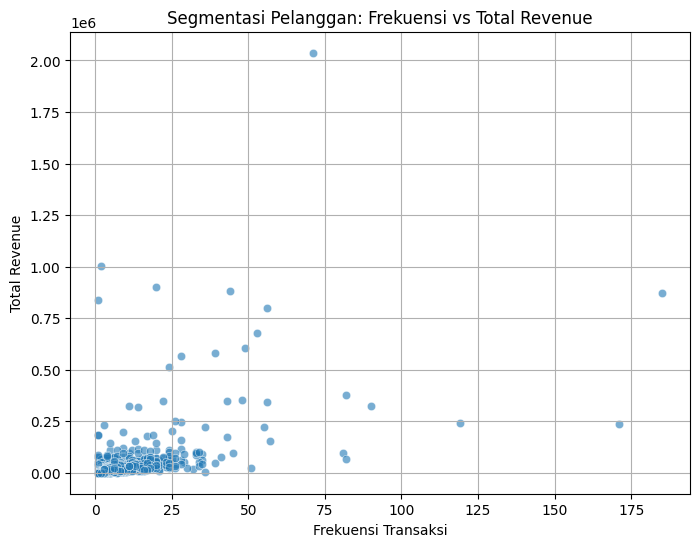

In [49]:
# Hitung frekuensi transaksi per customer
customer_freq = df_cleaned.groupby('CustomerNo')['TransactionNo'].nunique().reset_index()
customer_freq.rename(columns={'TransactionNo': 'TransactionCount'}, inplace=True)

# Hitung total revenue per customer
customer_revenue = df_cleaned.groupby('CustomerNo')['Revenue'].sum().reset_index()
customer_revenue.rename(columns={'Revenue': 'TotalRevenue'}, inplace=True)

# Gabungkan keduanya
customer_segment = pd.merge(customer_freq, customer_revenue, on='CustomerNo')

# Visualisasi scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=customer_segment, x='TransactionCount', y='TotalRevenue', alpha=0.6)
plt.title('Segmentasi Pelanggan: Frekuensi vs Total Revenue')
plt.xlabel('Frekuensi Transaksi')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


In [50]:
# Statistik deskriptif untuk frekuensi dan total revenue
stats = customer_segment[['TransactionCount', 'TotalRevenue']].describe()
print(" Statistik Deskriptif Segmentasi Pelanggan:\n")
print(stats)


 Statistik Deskriptif Segmentasi Pelanggan:

       TransactionCount  TotalRevenue
count       4572.000000  4.572000e+03
mean           3.988845  1.276983e+04
std            6.827090  5.272138e+04
min            1.000000  5.970000e+00
25%            1.000000  1.813003e+03
50%            2.000000  4.692950e+03
75%            4.000000  1.149609e+04
max          185.000000  2.037611e+06


## Segmentasi Pelanggan: Bronze / Silver / Gold

### Tujuan:
Mengelompokkan pelanggan berdasarkan total pembelanjaan (revenue) untuk memahami kelompok pelanggan terbaik (top spender) dan potensial.

### Metode:
- Top 20% revenue → **Gold**
- Tengah 60% → **Silver**
- Bottom 20% → **Bronze**
### Insight Segmentasi Pelanggan

- **20% pelanggan (Gold)** menyumbang sebagian besar revenue → sangat penting untuk dilayani secara personal.
- **60% pelanggan (Silver)** adalah potensi naik kelas → cocok untuk upselling dan loyalty campaign.
- **20% pelanggan (Bronze)** adalah pelanggan pasif → perlu strategi reaktivasi seperti diskon atau reminder.

### Strategi Bisnis:
- Kirim promo eksklusif hanya untuk pelanggan Gold.
- Dorong pelanggan Silver jadi Gold lewat bundling & voucher.
- Reaktivasi pelanggan Bronze dengan campaign "Come back & get 15% off".




In [51]:
# Buat salinan agar aman
customer_seg = customer_segment.copy()

# Hitung kuantil 20% dan 80%
q20 = customer_seg['TotalRevenue'].quantile(0.2)
q80 = customer_seg['TotalRevenue'].quantile(0.8)


In [52]:
def segment_customer(revenue):
    if revenue >= q80:
        return 'Gold'
    elif revenue >= q20:
        return 'Silver'
    else:
        return 'Bronze'

customer_seg['Segment'] = customer_seg['TotalRevenue'].apply(segment_customer)


In [53]:
segment_dist = customer_seg['Segment'].value_counts()
print(segment_dist)


Segment
Silver    2742
Bronze     915
Gold       915
Name: count, dtype: int64


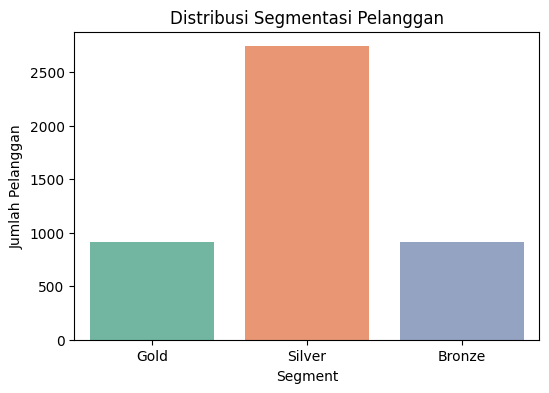

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(data=customer_seg, x='Segment', order=['Gold', 'Silver', 'Bronze'], palette='Set2')
plt.title('Distribusi Segmentasi Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.show()


##  Produk Favorit Pelanggan Gold

### Tujuan
Mengidentifikasi produk-produk paling populer di kalangan pelanggan terbaik (Gold), untuk mendukung strategi personalisasi dan promosi yang lebih tepat sasaran.

### 🔍 Insight: Produk Favorit Pelanggan Gold

- Produk paling sering dibeli oleh pelanggan Gold adalah **Jumbo Bag Red Retrospot** dengan 1175 transaksi.
- Sebagian besar produk favorit pelanggan Gold adalah barang-barang dekoratif, kitchenware, dan gift item.
- Pola ini mengindikasikan bahwa pelanggan terbaik menyukai produk dengan tema “vintage” dan “retail gift”.

### 💡 Rekomendasi:
- Gunakan produk-produk ini untuk program **loyalty bundling** dan **exclusive offer**.
- Fokuskan **email marketing** kepada pelanggan Gold dengan rekomendasi personal berdasarkan produk ini.
- Uji bundling produk favorit Gold untuk pelanggan Silver → naikkan ke Gold.



In [56]:
# Ambil CustomerNo dari pelanggan Gold
gold_customers = customer_seg[customer_seg['Segment'] == 'Gold']['CustomerNo'].unique()

# Filter data transaksi hanya dari pelanggan Gold
df_gold = df_cleaned[df_cleaned['CustomerNo'].isin(gold_customers)]


In [57]:
# Hitung produk favorit pelanggan Gold
gold_top_products = df_gold.groupby('ProductName')['TransactionNo'].nunique().reset_index()
gold_top_products.rename(columns={'TransactionNo': 'PurchaseCount'}, inplace=True)

# Urutkan dari yang paling sering dibeli
gold_top_products = gold_top_products.sort_values(by='PurchaseCount', ascending=False).head(10)


In [58]:
# ✅ Tampilkan sebagai tabel teks
print(" Top 10 Produk Favorit Pelanggan Gold:")
print(gold_top_products.to_string(index=False))

 Top 10 Produk Favorit Pelanggan Gold:
                       ProductName  PurchaseCount
           Jumbo Bag Red Retrospot           1175
          Regency Cakestand 3 Tier            960
Cream Hanging Heart T-Light Holder            947
           Lunch Bag Red Retrospot            945
                     Party Bunting            885
           Jumbo Bag Vintage Doily            774
                    Popcorn Holder            742
   Pack Of 72 Retrospot Cake Cases            724
           Lunch Bag Vintage Doily            722
             Lunch Bag Suki Design            714


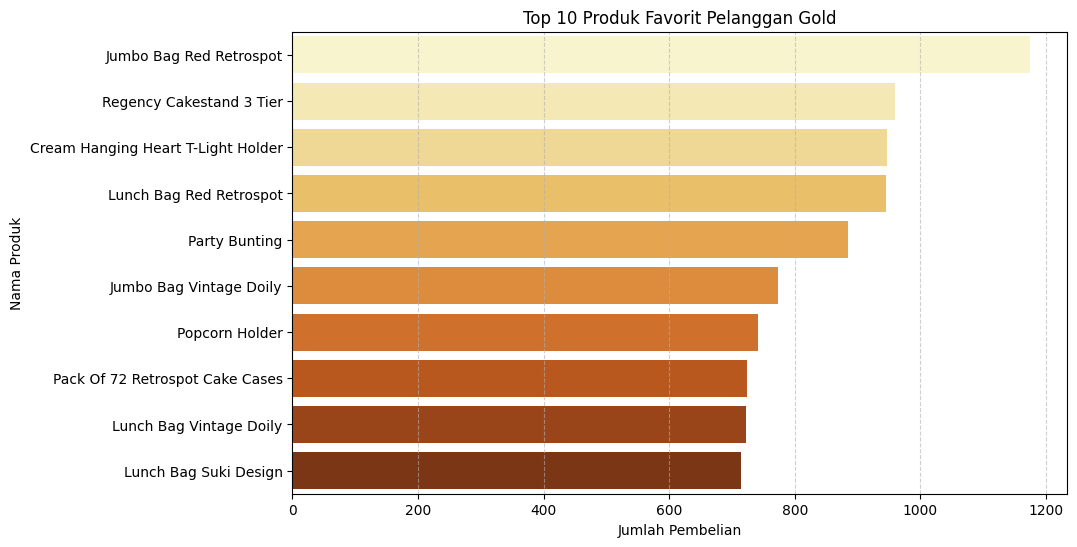

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(data=gold_top_products, y='ProductName', x='PurchaseCount', palette='YlOrBr')
plt.title('Top 10 Produk Favorit Pelanggan Gold')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Nama Produk')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


## 3.x Customer Churn Rate

### Apa itu Churn?
Customer churn adalah persentase pelanggan yang **tidak melakukan pembelian ulang** setelah transaksi pertama.

### Tujuan Analisis
Mengetahui seberapa besar potensi kehilangan pelanggan dari total pelanggan yang pernah membeli selama tahun 2019.

### Hasil Temuan:
-Jumlah pelanggan hanya beli 1x: 1.589 pelanggan
-Total pelanggan unik: 4.572 pelanggan
- Customer Churn Rate: 34.76%

> 💡 **Insight Bisnis**:
Sekitar 35% pelanggan hanya melakukan 1 kali transaksi sepanjang tahun 2019.
Ini mengindikasikan bahwa 1 dari 3 pelanggan tidak kembali, sehingga:

🔸 Perlu strategi retensi untuk mendorong repeat order, seperti:

Diskon pembelian kedua

Program loyalitas

Email follow-up setelah pembelian pertama

🔸 Dengan mengurangi churn hanya 5–10%, revenue tahunan dapat meningkat signifikan.


Jumlah pelanggan hanya beli 1x: 1589
Total pelanggan unik: 4572
Customer Churn Rate: 34.76%


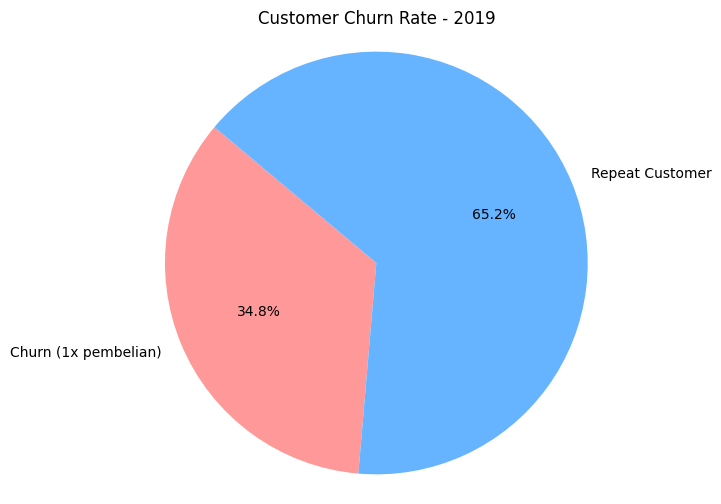

In [67]:
# Hitung jumlah transaksi unik per customer
transaksi_per_customer = df_cleaned.groupby('CustomerNo')['TransactionNo'].nunique()

# Hitung churn rate: pelanggan yang hanya beli 1x
hanya_sekali = transaksi_per_customer[transaksi_per_customer == 1].count()
total_pelanggan = transaksi_per_customer.count()
churn_rate = (hanya_sekali / total_pelanggan) * 100

# Print hasil
print(f"Jumlah pelanggan hanya beli 1x: {hanya_sekali}")
print(f"Total pelanggan unik: {total_pelanggan}")
print(f"Customer Churn Rate: {churn_rate:.2f}%")

# Visualisasi Pie Chart
import matplotlib.pyplot as plt

labels = ['Churn (1x pembelian)', 'Repeat Customer']
sizes = [hanya_sekali, total_pelanggan - hanya_sekali]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Customer Churn Rate - 2019')
plt.axis('equal')
plt.show()


## 4. Analisis Retensi Pelanggan (Cohort Analysis)

### 4.1 Tujuan
Mengukur **loyalitas pelanggan** dari bulan ke bulan. Apakah mereka melakukan pembelian ulang atau hanya sekali?

### 4.2 Langkah-langkah Analisis
1. Menentukan bulan pembelian pertama (`CohortMonth`) setiap customer.
2. Mengelompokkan transaksi ke dalam cohort berdasarkan bulan pertama.
3. Menghitung jumlah pelanggan unik per bulan setelah pembelian pertama.
4. Menghitung **retention rate** (rasio pelanggan yang kembali).
5. Membuat pivot table & visualisasi **heatmap**.

### 4.3 Insight Awal
- Pelanggan dari bulan-bulan awal (Jan–Mar) memiliki tingkat retensi yang relatif lebih baik.
- Setelah bulan ke-2 atau ke-3, banyak pelanggan yang tidak kembali.
- Menunjukkan bahwa mayoritas pelanggan hanya membeli sekali (tidak loyal).

### 💡 Rekomendasi
- Buat **program loyalitas**, **email follow-up**, atau **insentif pembelian kedua**.
- Segmentasi cohort bisa digunakan untuk menargetkan pelanggan berdasarkan siklus pembeliannya.


In [31]:
cohort_df = df_cleaned[['CustomerNo', 'Date']].copy()
cohort_df.dropna(inplace=True)  # pastikan tidak ada NaN

In [32]:
cohort_df['OrderMonth'] = cohort_df['Date'].dt.to_period('M')
cohort_df['CohortMonth'] = cohort_df.groupby('CustomerNo')['Date'].transform('min').dt.to_period('M')

In [33]:
def get_month_diff(order, cohort):
    return (order.dt.year - cohort.dt.year) * 12 + (order.dt.month - cohort.dt.month)

cohort_df['CohortIndex'] = get_month_diff(
    cohort_df['OrderMonth'].dt.to_timestamp(), 
    cohort_df['CohortMonth'].dt.to_timestamp()
)

In [34]:
cohort_pivot = cohort_df.pivot_table(
    index='CohortMonth',
    columns='CohortIndex',
    values='CustomerNo',
    aggfunc='nunique'
)

In [35]:
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0)

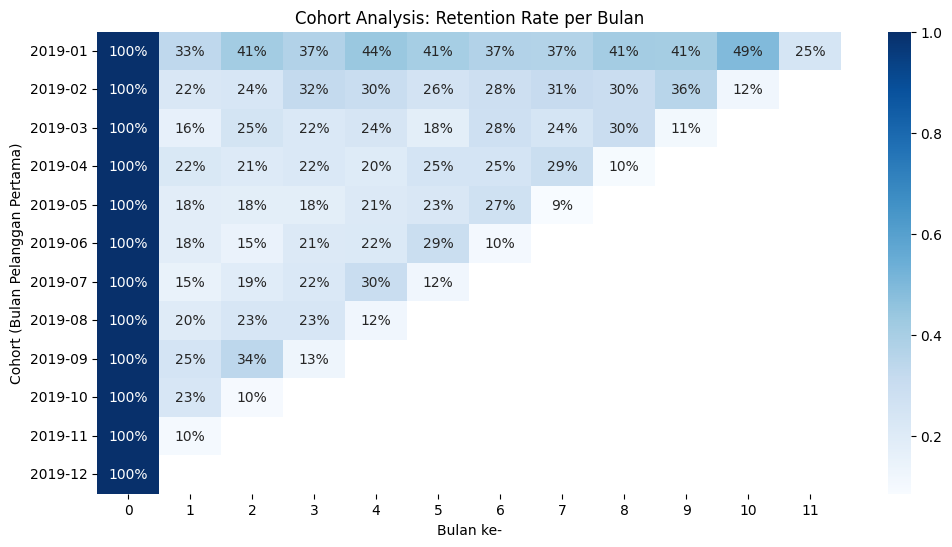

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Analysis: Retention Rate per Bulan')
plt.xlabel('Bulan ke-')
plt.ylabel('Cohort (Bulan Pelanggan Pertama)')
plt.show()

In [ ]:
## Tahap 4 – Cohort Analysis: Analisis Retensi Pelanggan

### Tujuan:
Mengukur sejauh mana pelanggan yang pertama kali membeli pada bulan tertentu kembali melakukan transaksi di bulan-bulan berikutnya. Ini membantu memahami loyalitas pelanggan dan efektivitas retensi.

### Langkah Analisis:
1. Menentukan bulan pertama pelanggan melakukan pembelian (`CohortMonth`)
2. Mengelompokkan pelanggan ke dalam cohort berdasarkan bulan pembelian pertama
3. Menghitung jumlah pelanggan unik per bulan dalam cohort
4. Menghitung **retention rate**: rasio pelanggan yang kembali per bulan setelah pembelian pertama
5. Menampilkan hasil dalam bentuk heatmap

### Interpretasi Visualisasi:
- Retensi pelanggan paling tinggi berasal dari cohort awal (Januari–Maret 2019), yang menunjukkan pelanggan di awal tahun lebih loyal.
- Setelah bulan ke-2 atau ke-3, retensi menurun drastis di hampir semua cohort.
- Ini menunjukkan bahwa sebagian besar pelanggan hanya bertransaksi 1–2 kali, lalu tidak kembali.

### Insight:
- Tidak adanya program loyalitas atau insentif membuat sebagian besar pelanggan tidak melakukan pembelian ulang.
- Diperlukan strategi khusus seperti **loyalty program**, **email follow-up**, atau **diskon untuk pembelian kedua** agar pelanggan lebih setia.

In [37]:
# Hitung jumlah transaksi per Customer
customer_freq = df_cleaned.groupby('CustomerNo')['TransactionNo'].nunique()

# Hitung rata-rata frekuensi belanja
avg_freq = customer_freq.mean()

print(f"Rata-rata frekuensi belanja per customer selama 2019: {avg_freq:.2f} kali")

Rata-rata frekuensi belanja per customer selama 2019: 3.99 kali


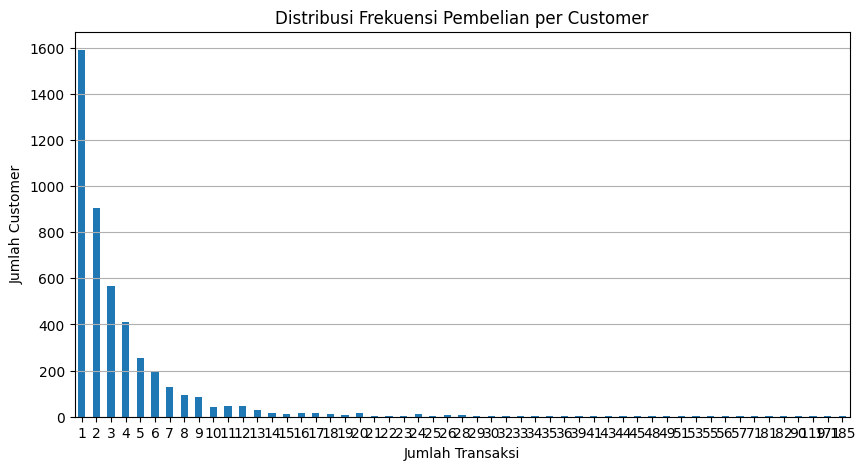

In [38]:
import matplotlib.pyplot as plt

# Plot distribusi jumlah transaksi per pelanggan
customer_freq.value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Distribusi Frekuensi Pembelian per Customer')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## 5. Analisis Sensitivitas Harga (Price Sensitivity)

### 5.1 Tujuan
Mengetahui **seberapa sensitif** suatu produk terhadap perubahan harga.  
Produk yang sangat sensitif cenderung turun penjualannya saat harga naik.

### 5.2 Metodologi
- Pilih produk yang memiliki **≥ 5 variasi harga** agar analisis korelasi valid.
- Hitung korelasi antara **`Price`** dan **`Quantity`** untuk tiap produk.
- Korelasi negatif kuat menunjukkan produk **elastis** terhadap harga.

### 5.3 Visualisasi
- Buat daftar top 10 produk paling sensitif (dengan korelasi negatif paling besar).
- Gunakan scatter plot untuk melihat hubungan harga dan jumlah pembelian.

### 📌 Insight
- Produk seperti “Bling Key Ring” memiliki korelasi negatif tinggi → **tidak cocok untuk strategi kenaikan harga**.
- Cocok untuk pendekatan: **diskon, bundling, promosi beli banyak**.

### 💡 Rekomendasi
- Hindari menaikkan harga produk elastis.
- Gunakan harga sebagai alat promosi strategis untuk produk-produk ini.


In [39]:
# Hitung jumlah variasi harga per produk
price_variety = df_cleaned.groupby('ProductName')['Price'].nunique()

# Ambil produk dengan minimal 5 variasi harga
produk_bervariasi = price_variety[price_variety >= 5].index

In [40]:
korelasi_list = []

for produk in produk_bervariasi:
    subset = df_cleaned[df_cleaned['ProductName'] == produk]
    if subset['Quantity'].nunique() > 1:
        corr = subset['Price'].corr(subset['Quantity'])
        korelasi_list.append({'ProductName': produk, 'Correlation': corr})

In [41]:
corr_df = pd.DataFrame(korelasi_list)
corr_df = corr_df.dropna().sort_values(by='Correlation')
corr_df.head(10)  # 10 produk paling sensitif terhadap harga

,ProductName,Correlation
1051,"Letter ""D"" Bling Key Ring",-0.855851
936,Ivory Chandelier T-Light Holder,-0.833198
1118,Marie Antoinette Trinket Box Gold,-0.824716
1482,Purple Gemstone Bracelet,-0.818881
1055,"Letter ""L"" Bling Key Ring",-0.814210
1060,"Letter ""Y"" Bling Key Ring",-0.800193
1057,"Letter ""P"" Bling Key Ring",-0.787971
808,Green Birdhouse Decoration,-0.727960
801,Gold Fishing Gnome,-0.727594
1228,Ocean Scent Candle In Jewelled Box,-0.701712


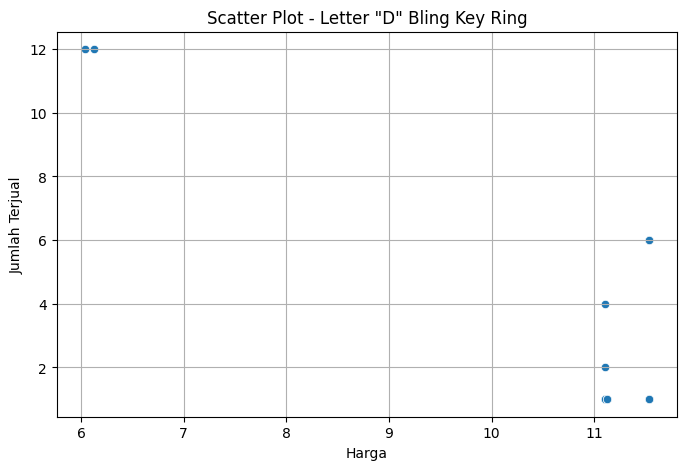

In [42]:
# Pilih salah satu produk paling elastis
produk_terelastis = corr_df.iloc[0]['ProductName']

# Ambil datanya
produk_data = df_cleaned[df_cleaned['ProductName'] == produk_terelastis]

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(data=produk_data, x='Price', y='Quantity')
plt.title(f'Scatter Plot - {produk_terelastis}')
plt.xlabel('Harga')
plt.ylabel('Jumlah Terjual')
plt.grid(True)
plt.show()

## 6. Basket Size Analysis

### 6.1 Tujuan
Menganalisis **rata-rata jumlah item** dalam satu transaksi untuk melihat pola belanja pelanggan:
- Apakah pelanggan belanja banyak atau sedikit item?
- Apakah ada perbedaan antara satu negara dengan negara lain?

### 6.2 Metode
- Hitung rata-rata item per transaksi **per hari**.
- Hitung rata-rata item per transaksi **per negara**.
- Bersihkan outlier: `Quantity > 100` dihapus agar hasil tidak bias.

### 6.3 Visualisasi
- Line chart untuk basket size harian.
- Bar chart untuk basket size berdasarkan negara.

### 📌 Insight
- Basket size harian cenderung stabil, menunjukkan konsistensi pola belanja.
- Negara seperti Singapore, Netherlands, dan Norway memiliki basket size tinggi → **potensi promosi bundling / up-sell**.

### 💡 Rekomendasi
- Fokuskan promosi paket atau diskon kuantitas pada negara-negara dengan basket besar.
- Gunakan pola ini untuk mengatur strategi logistik dan stok.


In [43]:
df_no_outlier = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['Quantity'] <= 100)]

In [44]:
# 1. Transaksi harian
transaksi = df_no_outlier.groupby(['Date', 'TransactionNo'])['Quantity'].sum().reset_index()

# 2. Rata-rata item per transaksi per hari
basket_daily = transaksi.groupby('Date')['Quantity'].mean()
basket_daily.head(10)

Date
2019-01-04    216.916667
2019-01-05    282.264151
2019-01-06    366.500000
2019-01-07    272.442308
2019-01-09    161.250000
2019-01-10    311.526316
2019-01-11    211.962264
2019-01-12    228.466667
2019-01-13    210.372093
2019-01-14    279.255319
Name: Quantity, dtype: float64

In [66]:
transaksi_negara = df_no_outlier.groupby(['Country', 'TransactionNo'])['Quantity'].sum().reset_index()
basket_by_country = transaksi_negara.groupby('Country')['Quantity'].mean().sort_values(ascending=False)
basket_by_country.head(10)

Country
Singapore               1236.500000
Netherlands              983.743902
Japan                    622.400000
Australia                583.500000
Switzerland              561.666667
Israel                   495.111111
United Arab Emirates     490.500000
Canada                   490.500000
Iceland                  487.142857
Norway                   459.461538
Name: Quantity, dtype: float64

In [67]:
transaksi = df_cleaned.groupby(['Date', 'TransactionNo'])['Quantity'].sum().reset_index()

In [68]:
basket_daily = transaksi.groupby('Date')['Quantity'].mean()

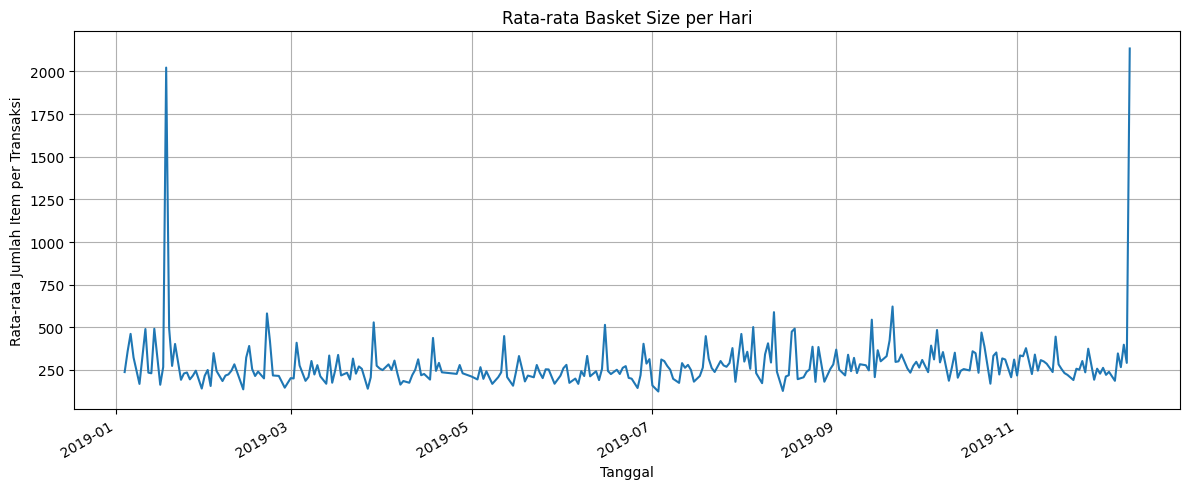

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
basket_daily.plot()
plt.title('Rata-rata Basket Size per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Jumlah Item per Transaksi')
plt.grid(True)
plt.tight_layout()
plt.show()

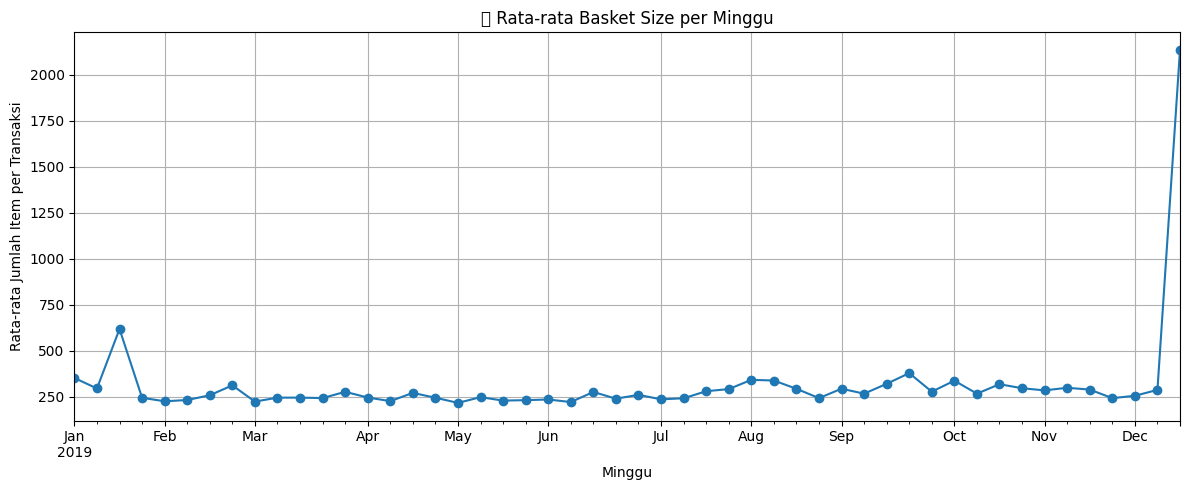

In [63]:
# 1. Hitung total item per transaksi per hari
transaksi = df_cleaned.groupby(['Date', 'TransactionNo'])['Quantity'].sum().reset_index()

# 2. Hitung rata-rata basket size per hari
basket_daily = transaksi.groupby('Date')['Quantity'].mean().reset_index()

# 3. Agregasi mingguan: rata-rata basket size per minggu
basket_daily['Date'] = pd.to_datetime(basket_daily['Date'])
basket_weekly = basket_daily.resample('W', on='Date')['Quantity'].mean()

# 4. Visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
basket_weekly.plot(marker='o')
plt.title('📦 Rata-rata Basket Size per Minggu')
plt.xlabel('Minggu')
plt.ylabel('Rata-rata Jumlah Item per Transaksi')
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
basket_weekly.head(10)


Date
2019-01-06    352.652020
2019-01-13    295.797956
2019-01-20    618.693524
2019-01-27    245.101232
2019-02-03    226.208653
2019-02-10    233.073978
2019-02-17    258.903084
2019-02-24    312.793118
2019-03-03    224.486057
2019-03-10    245.892320
Freq: W-SUN, Name: Quantity, dtype: float64

In [ ]:
# Pastikan kolom Date sudah dalam format datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Tambahkan kolom Revenue (jika belum)
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['Price']

# Agregasi revenue per minggu
revenue_per_week = df_cleaned.resample('W', on='Date')['Revenue'].sum()

# Visualisasi tren mingguan
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
revenue_per_week.plot(marker='o')
plt.title('📈 Tren Penjualan Mingguan (Total Revenue)')
plt.xlabel('Minggu')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


In [70]:
# Jumlah item per transaksi
transaksi_negara = df_cleaned.groupby(['Country', 'TransactionNo'])['Quantity'].sum().reset_index()

# Hitung rata-rata basket size per negara
basket_by_country = transaksi_negara.groupby('Country')['Quantity'].mean().sort_values(ascending=False)

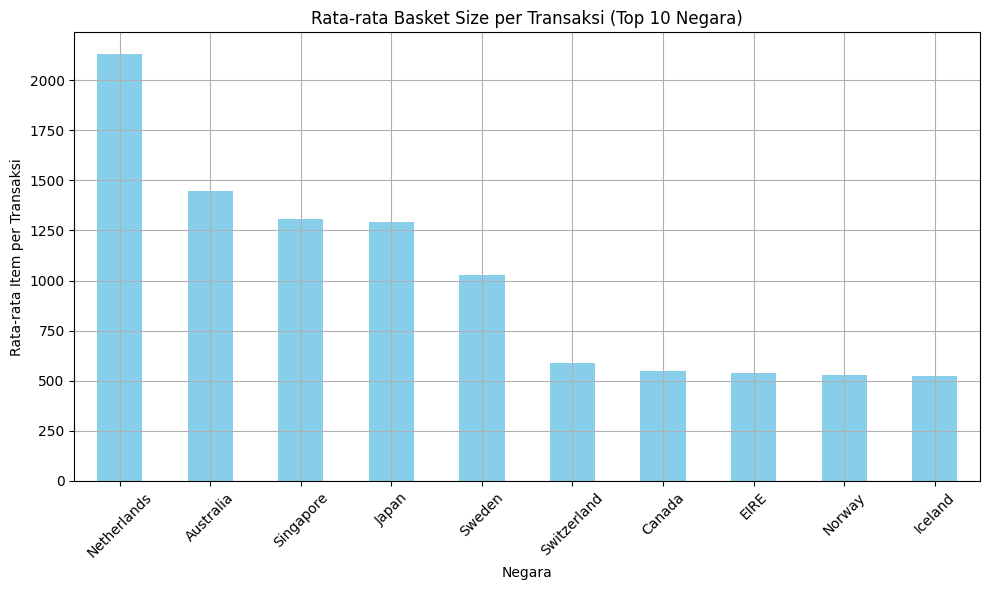

In [71]:
plt.figure(figsize=(10,6))
basket_by_country.head(10).plot(kind='bar', color='skyblue')  # tampilkan 10 negara teratas
plt.title('Rata-rata Basket Size per Transaksi (Top 10 Negara)')
plt.ylabel('Rata-rata Item per Transaksi')
plt.xlabel('Negara')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
## Tahap 6 – Basket Size Analysis

### 🎯 Tujuan:
Menganalisis rata-rata jumlah produk yang dibeli dalam satu transaksi (**basket size**) untuk memahami pola belanja pelanggan:
- Apakah pelanggan cenderung membeli banyak item atau hanya sedikit?
- Apakah ukuran keranjang berbeda antar negara?

---

### 🔧 Pembersihan Data:
- Transaksi dengan `Quantity <= 0` (retur atau error) **dihapus**.
- Transaksi dengan `Quantity > 100` dianggap sebagai **outlier** dan **dikeluarkan** dari analisis untuk menjaga fokus pada pola pelanggan ritel normal.

---

### 📈 Analisis 1: Basket Size per Hari

- Dihitung rata-rata jumlah item per transaksi **setiap hari**.
- Menunjukkan fluktuasi tren harian terhadap ukuran keranjang.
- Setelah pembersihan, basket size per hari berada dalam rentang yang wajar (tidak ekstrem).

---

### 📊 Analisis 2: Basket Size antar Negara

- Dihitung rata-rata jumlah item per transaksi untuk **setiap negara**.
- Negara seperti **Singapore, Netherlands, dan Norway** memiliki rata-rata basket size terbesar.
- Hal ini menunjukkan potensi perilaku pembelian dalam jumlah besar atau pelanggan lebih loyal di negara-negara tertentu.

---

### 💡 Insight:

- **Rata-rata ukuran keranjang per hari** mencerminkan pola belanja stabil, meskipun naik-turun sedikit tiap hari.
- **Negara tertentu** menunjukkan pola pembelian dalam jumlah lebih banyak per transaksi, yang bisa jadi target strategis untuk promosi volume-based.
- Setelah pembersihan, data menjadi lebih representatif dan cocok untuk analisis perilaku pelanggan ritel biasa.

## 7. Tren Penjualan Harian & Mingguan

### 7.1 Tujuan
Melihat tren penjualan dari waktu ke waktu:
- Apakah ada hari-hari tertentu dengan penjualan tinggi?
- Apakah penjualan meningkat di akhir tahun?
- Hari apa dalam seminggu yang paling ramai?

---

### 7.2 Analisis Harian
- Hitung total `Revenue` per hari.
- Visualisasi dalam bentuk **line chart**.

📌 **Insight**:
- Ada lonjakan tertentu di waktu tertentu (bisa diasosiasikan dengan event atau musim belanja).
- Tren ini bisa digunakan untuk perencanaan stok dan promosi.

---

### 7.3 Analisis Mingguan (Hari dalam Seminggu)
- Hitung total revenue untuk setiap hari: Senin s/d Minggu.
- Visualisasi menggunakan **bar chart**.

📌 **Insight**:
- Hari Minggu dan Jumat biasanya menunjukkan penjualan tertinggi.
- Bisa digunakan untuk menentukan waktu terbaik menjalankan promosi atau diskon.

---

### 💡 Rekomendasi
- Manfaatkan hari dengan penjualan tinggi untuk menjalankan promo flash sale.
- Lakukan penguatan strategi di hari-hari dengan penjualan rendah.


In [58]:
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['Price']

In [59]:
revenue_per_day = df_cleaned.groupby('Date')['Revenue'].sum()

In [60]:
revenue_per_day.head(10)

Date
2019-01-04    102158.04
2019-01-05    224901.37
2019-01-06    267053.40
2019-01-07    189507.91
2019-01-09     95529.21
2019-01-10    154767.95
2019-01-11    358297.18
2019-01-12    132285.59
2019-01-13    118414.74
2019-01-14    273397.19
Name: Revenue, dtype: float64

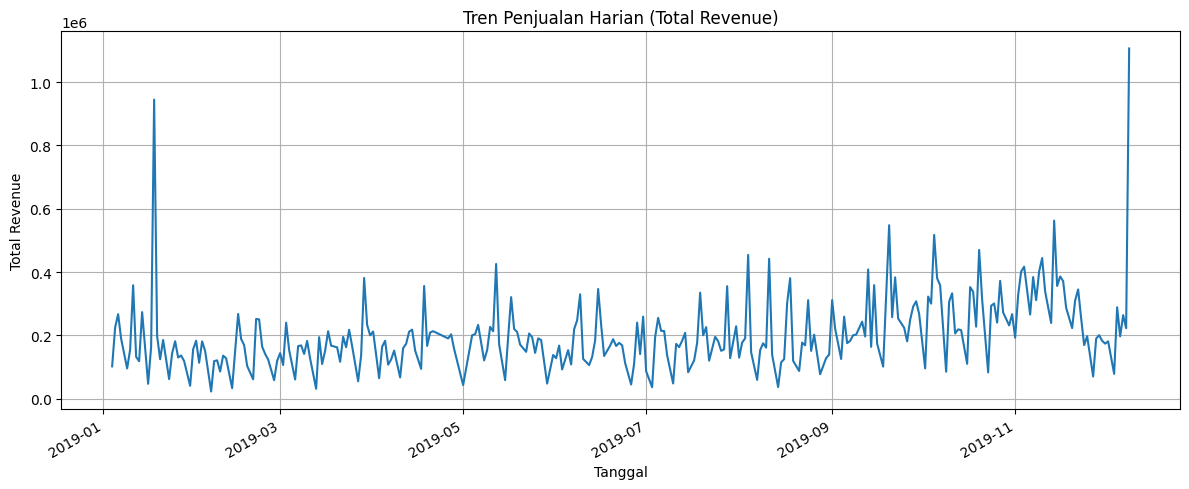

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
revenue_per_day.plot()
plt.title('Tren Penjualan Harian (Total Revenue)')
plt.xlabel('Tanggal')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

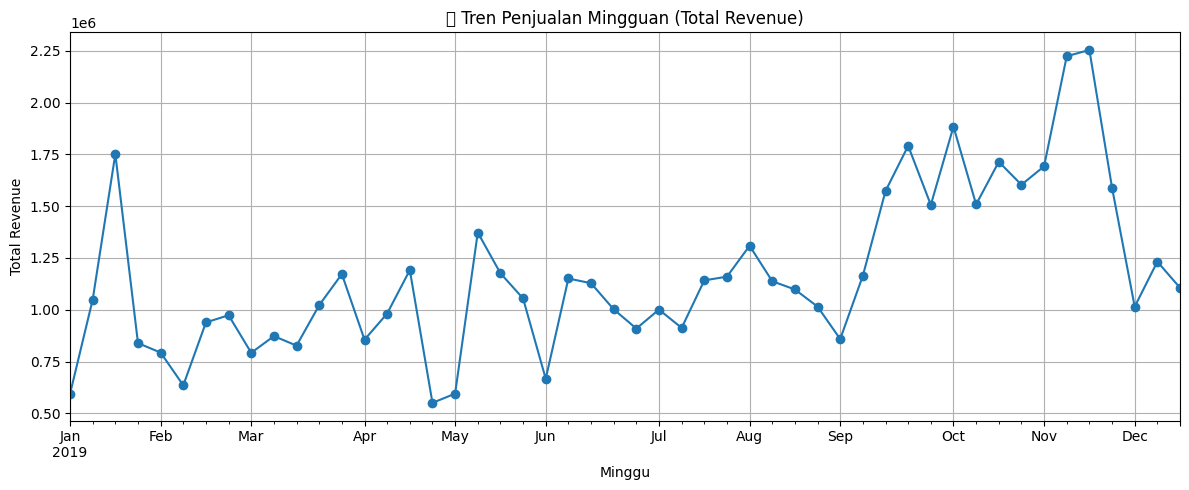

In [62]:
# Pastikan kolom Date sudah dalam format datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Tambahkan kolom Revenue (jika belum)
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['Price']

# Agregasi revenue per minggu
revenue_per_week = df_cleaned.resample('W', on='Date')['Revenue'].sum()

# Visualisasi tren mingguan
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
revenue_per_week.plot(marker='o')
plt.title('📈 Tren Penjualan Mingguan (Total Revenue)')
plt.xlabel('Minggu')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
revenue_per_week.head(10)


Date
2019-01-06     594112.81
2019-01-13    1048802.58
2019-01-20    1751156.01
2019-01-27     839050.82
2019-02-03     793250.81
2019-02-10     635289.59
2019-02-17     938993.76
2019-02-24     973442.01
2019-03-03     792222.19
2019-03-10     872801.08
Freq: W-SUN, Name: Revenue, dtype: float64

In [62]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], dayfirst=True, errors='coerce')


In [63]:
# Tambahkan kolom hari dari tanggal
df_cleaned['DayOfWeek'] = df_cleaned['Date'].dt.day_name()


In [64]:
# Group total revenue per hari dalam seminggu
revenue_per_dayofweek = df_cleaned.groupby('DayOfWeek')['Revenue'].sum()

# Urutkan sesuai urutan hari
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_per_dayofweek = revenue_per_dayofweek.reindex(day_order)

# Tampilkan hasil numeriknya
print(revenue_per_dayofweek)

DayOfWeek
Monday        9597722.64
Tuesday              NaN
Wednesday     4915292.23
Thursday      9189140.44
Friday       11893123.06
Saturday     10341232.69
Sunday       12447145.09
Name: Revenue, dtype: float64


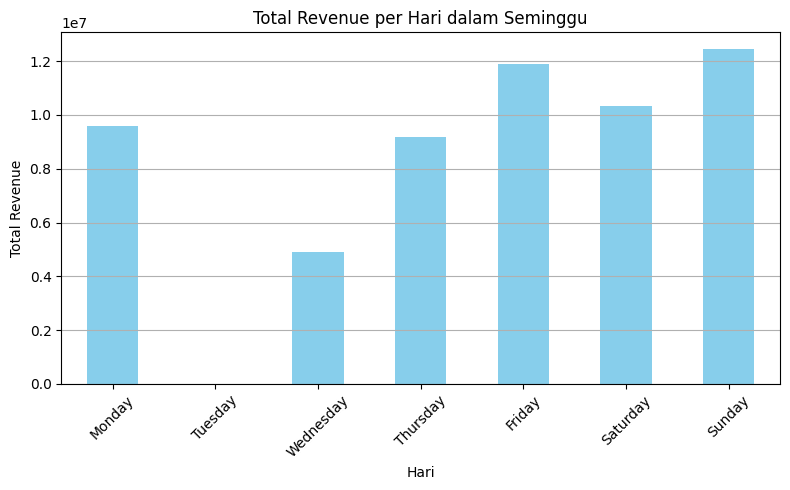

In [65]:
import matplotlib.pyplot as plt

# Group total revenue per hari dalam seminggu
revenue_per_dayofweek = df_cleaned.groupby('DayOfWeek')['Revenue'].sum()

# Urutkan hari agar sesuai urutan kalender
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_per_dayofweek = revenue_per_dayofweek.reindex(day_order)

# Plot bar chart
plt.figure(figsize=(8, 5))
revenue_per_dayofweek.plot(kind='bar', color='skyblue')
plt.title('Total Revenue per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Jumlah pelanggan hanya beli 1x: 1589
Total pelanggan unik: 4572
Customer Churn Rate: 34.76%


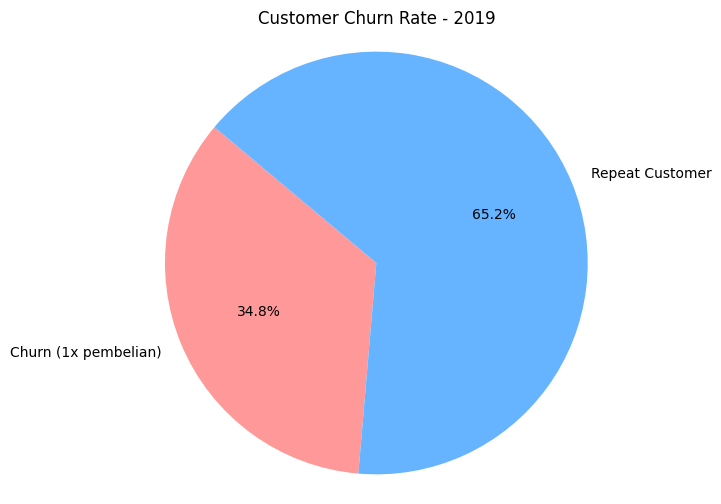

In [68]:
# Hitung jumlah transaksi unik per customer
transaksi_per_customer = df_cleaned.groupby('CustomerNo')['TransactionNo'].nunique()

# Hitung churn rate: pelanggan yang hanya beli 1x
hanya_sekali = transaksi_per_customer[transaksi_per_customer == 1].count()
total_pelanggan = transaksi_per_customer.count()
churn_rate = (hanya_sekali / total_pelanggan) * 100

# Print hasil
print(f"Jumlah pelanggan hanya beli 1x: {hanya_sekali}")
print(f"Total pelanggan unik: {total_pelanggan}")
print(f"Customer Churn Rate: {churn_rate:.2f}%")

# Visualisasi Pie Chart
import matplotlib.pyplot as plt

labels = ['Churn (1x pembelian)', 'Repeat Customer']
sizes = [hanya_sekali, total_pelanggan - hanya_sekali]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Customer Churn Rate - 2019')
plt.axis('equal')
plt.show()
